# Extract light curve

The required light curve files and target pixels files of beta Pic in the sectors 4 through 7 were downloaded from the MAST archive and saved in the directory "mast_files".

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

import os

import lightkurve as lk

In [14]:
#your current directory
os.getcwd()

'/home/sebastian/kraken/betaPic_comet/lightcurve'

In [19]:
#go into the directory 'mast_files'
a = os.getcwd().split("/")
datadir = ''.join([i+'/' for i in a][:-1])
datadir

'/home/sebastian/kraken/betaPic_comet/'

In [20]:
datadir = datadir + 'mast_files'

datafile4_lc = '/s4/tess2018292075959-s0004-0000000270577175-0124-s_lc.fits'
datafile4_tp = '/s4/tess2018292075959-s0004-0000000270577175-0124-s_tp.fits'

datafile5_lc = '/s5/tess2018319095959-s0005-0000000270577175-0125-s_lc.fits'
datafile5_tp = '/s5/tess2018319095959-s0005-0000000270577175-0125-s_tp.fits'

datafile6_lc = '/s6/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits'
datafile6_tp = '/s6/tess2018349182459-s0006-0000000270577175-0126-s_tp.fits'

datafile7_lc = '/s7/tess2019006130736-s0007-0000000270577175-0131-s_lc.fits'
datafile7_tp = '/s7/tess2019006130736-s0007-0000000270577175-0131-s_tp.fits'

In [21]:
datadir

'/home/sebastian/kraken/betaPic_comet/mast_files'

In [24]:
data4 = fits.getdata(datadir + datafile4_lc)
data5 = fits.getdata(datadir + datafile5_lc)
data6 = fits.getdata(datadir + datafile6_lc)
data7 = fits.getdata(datadir + datafile7_lc)

# Let's do some work on the light curves:
- remove nans in TIME and PDCSAP_FLUX
- remove non-zero quality flags
- remove event 1421 and 1424 in the first sector (sector 4) 

In [25]:
#a function in order to create a mask for removing data with a non-zero quality flag and nan data
def remove_nans_quality(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

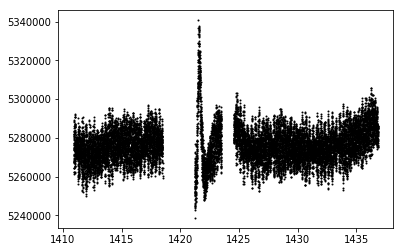

In [26]:
t4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[0]
f4 = remove_nans_quality(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[1]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

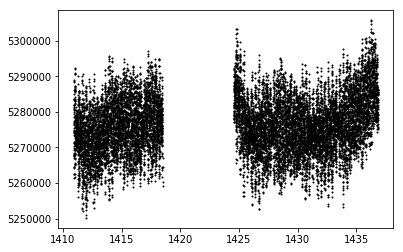

In [27]:
#remove instrumental thingy in this sector (sector 4)
mask_instrumental = (1421 < t4) & (t4 < 1424)

t4 = t4[~mask_instrumental]
f4 = f4[~mask_instrumental]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

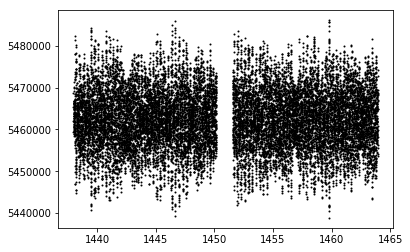

In [28]:
t5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[0]
f5 = remove_nans_quality(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[1]

plt.scatter(t5, f5, s=1, c='k')
plt.show()

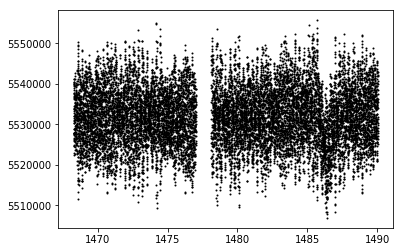

In [29]:
t6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

plt.scatter(t6, f6, s=1, c='k')
plt.show()

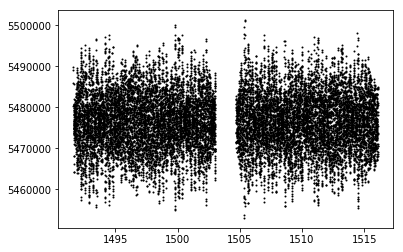

In [30]:
t7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7 = remove_nans_quality(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

plt.scatter(t7, f7, s=1, c='k')
plt.show()

In [31]:
#function in order to normalize our light curve
def div_median(flux):
    return flux / np.median(flux)

In [36]:
def comb(arr1, arr2, arr3, arr4):
    tmp1 = arr1.tolist()
    tmp2 = arr2.tolist()
    tmp3 = arr3.tolist()
    tmp4 = arr4.tolist()
    return tmp1 + tmp2 + tmp3 + tmp4

In [37]:
t = comb(t4, t5, t6, t7)
f = comb(div_median(f4), div_median(f5), div_median(f6), div_median(f7))

In [38]:
#The sectors 4 - 7 started approx. at the following BTJD time:
sectors = [1410.9, 1437.8, 1465.2, 1491.6]

The following times of momentum dumps were extracted from the full frames images (FFIs). Those also can be downloaded from the MAST archive, however they are much bigger than the light curve or the target pixel files, so the were not uploaded to this GitHub.

In [39]:
#momentum dump times for sector 4
mom_dumps0 = [1413.9164351853542,
   1416.9164351853542,
   1422.9164351853542,
   1427.562268518377,
   1430.562268518377,
   1433.562268518377,
   1436.5622569443658]

#momentum dump times for sector 5
mom_dumps1 = [1441.0205902778544,
   1444.0205902778544,
   1447.0205902778544,
   1450.0205902778544,
   1454.5830902778544,
   1457.5830902778544,
   1460.5830902778544,
   1463.5830902778544]

#momentum dump times for sector 6
mom_dumps2 = [1468.3747569443658,
   1471.4997569443658,
   1474.6247569443658,
   1481.2705902778544,
   1484.395578703843,
   1487.520578703843]

#momentum dump times for sector 7
mom_dumps3 = [1491.624722222332,
   1494.7913888888434,
   1497.9163888888434,
   1501.0413888888434,
   1507.8538888888434,
   1510.9788888888434,
   1514.1038888888434]

# Let's make a plot of the PDCSAP lc with markings of various events (dimming, mom. dumps & other anomalies) --- was used in the paper.

<Figure size 432x288 with 0 Axes>

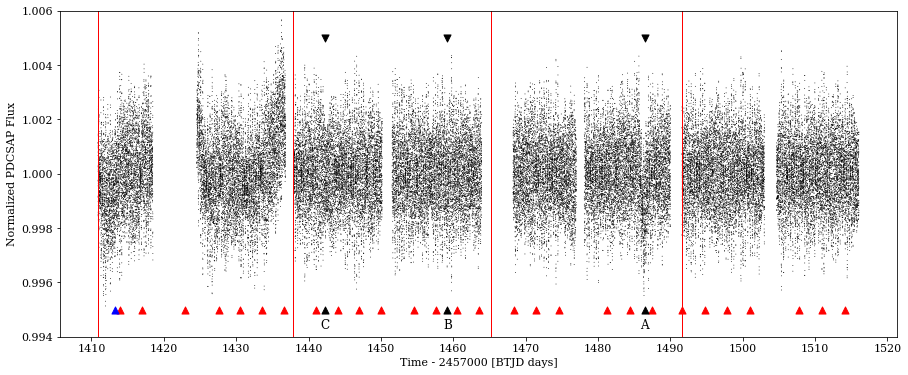

In [40]:
plt.rc('font', family='serif', size=11)
plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(15, 6))


#plot the measurements
ax.scatter(t, f, s=0.75, c='k', edgecolor = '')

ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

#mark the beginning of sectors
[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]


#ax.arrow(1486.5, 0.994, 0, 0.0005, fc='k', ec='k', width=0.2, head_width=0.8, head_length=0.0006) #head_width=1, head_length=0.00001
#ax.arrow(1459.2, 0.994, 0, 0.0005, fc='k', ec='k', width=0.2, head_width=0.8, head_length=0.0006)
#ax.arrow(1442.3, 0.994, 0, 0.0005, fc='k', ec='k', width=0.2, head_width=0.8, head_length=0.0006)


#mark the momentum dumps
[ax.scatter(i, 0.995, marker='^', s=50, c='r') for i in mom_dumps0] 
[ax.scatter(i, 0.995, marker='^', s=50, c='r') for i in mom_dumps1] 
[ax.scatter(i, 0.995, marker='^', s=50, c='r') for i in mom_dumps2]
[ax.scatter(i, 0.995, marker='^', s=50, c='r') for i in mom_dumps3]

plt.rc('font', family='serif', size=12)

#label the dimming events
ax.text(1442.3, 0.9943, 'C', horizontalalignment='center') 
ax.text(1459.2, 0.9943, 'B', horizontalalignment='center') 
ax.text(1486.5, 0.9943, 'A', horizontalalignment='center') 


ax.set_xticks(np.arange(1410, 1530, 10))

#mark the updated star table
ax.scatter(1413.26, 0.995, marker='^', s=50, c='b')


#mark the dimming events
ax.scatter(1486.5, 0.995, marker='^', s=50, c='k')
ax.scatter(1459.2, 0.995, marker='^', s=50, c='k')
ax.scatter(1442.3, 0.995, marker='^', s=50, c='k')

ax.scatter(1486.5, 1.005, marker='v', s=50, c='k')
ax.scatter(1459.2, 1.005, marker='v', s=50, c='k')
ax.scatter(1442.3, 1.005, marker='v', s=50, c='k')

plt.show()

#fig.savefig('betaPic_lc_all4.pdf', bbox_inches='tight')

Export the light curve as instrumental magnitudes.

In [453]:
datapairs=np.stack((t, -2.5*np.log10(f)), axis=-1)
np.savetxt('betaPic_mag_all.txt',datapairs)

# Next we make the light curve which was used for the frequency analysis.

## Additionally to the previous modifications, we want to remove 10 min before and after an momentum dump

In [41]:
def remove_nans_quality_md(time, flux, quality):
    nan_mask_time = ~np.isnan(time)
    nan_mask_flux = ~np.isnan(flux)
    zero_quality  = quality == 0
    
    mask_q = (quality == 32) | (quality == 128)
    
    ten_min = 10/1440 #10 minutes


    mask_list= [np.logical_and(time>time[i]-ten_min, time<time[i]+ten_min) for i in np.where(mask_q)[0]]
    mask_md = np.logical_not(np.any(np.array(mask_list),axis=0))
    
    mask_comb = nan_mask_time & nan_mask_flux & zero_quality & mask_md
    return [time[mask_comb], flux[mask_comb], quality[mask_comb]]

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


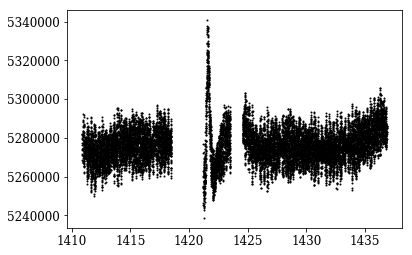

In [42]:
t4 = remove_nans_quality_md(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[0]
f4 = remove_nans_quality_md(data4['TIME'], data4['PDCSAP_FLUX'], data4['QUALITY'])[1]

plt.scatter(t4, f4, s=1, c='k')

plt.show()

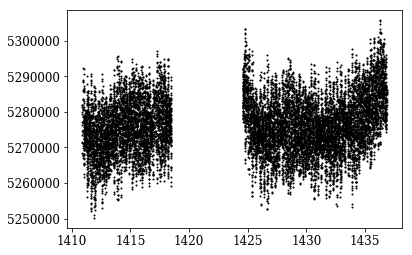

In [43]:
#remove instrumental thingy
mask_instrumental = (1421 < t4) & (t4 < 1424)

t4 = t4[~mask_instrumental]
f4 = f4[~mask_instrumental]

plt.scatter(t4, f4, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


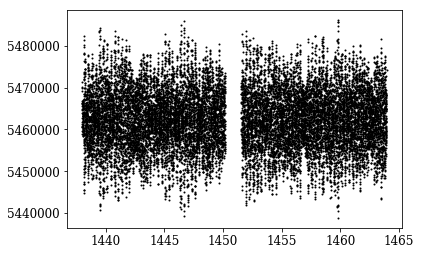

In [44]:
t5 = remove_nans_quality_md(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[0]
f5 = remove_nans_quality_md(data5['TIME'], data5['PDCSAP_FLUX'], data5['QUALITY'])[1]

plt.scatter(t5, f5, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


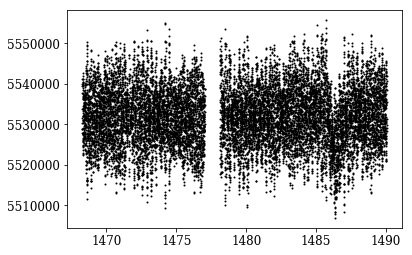

In [45]:
t6 = remove_nans_quality_md(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[0]
f6 = remove_nans_quality_md(data6['TIME'], data6['PDCSAP_FLUX'], data6['QUALITY'])[1]

plt.scatter(t6, f6, s=1, c='k')
plt.show()

/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


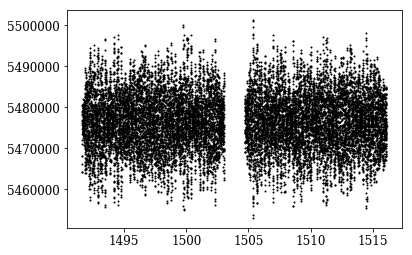

In [46]:
t7 = remove_nans_quality_md(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[0]
f7 = remove_nans_quality_md(data7['TIME'], data7['PDCSAP_FLUX'], data7['QUALITY'])[1]

plt.scatter(t7, f7, s=1, c='k')
plt.show()

In [47]:
t = comb(t4, t5, t6, t7)
f = comb(div_median(f4), div_median(f5), div_median(f6), div_median(f7))

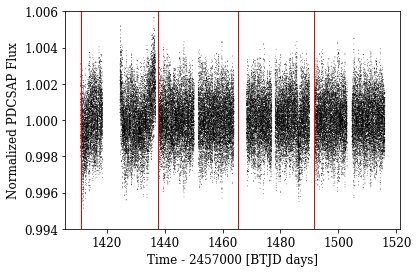

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t, f, s=0.5, c='k', edgecolor = '')

ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]

plt.show()

#fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

## For the frequency analysis we remove the 3 dimming events and the measurements done one hour earlier and later. We also remove the complete first sector (Sector 4)

In [49]:
# dimming times:
# -1 hour if start
# +1 hour if end

hour = 1/24

s1 = 1442.1 - hour
e1 = 1442.7 + hour
s2 = 1458.7 - hour
e2 = 1459.8 + hour
s3 = 1485.7 - hour
e3 = 1488.3 + hour

In [50]:
t = np.array(t)
f = np.array(f)

In [51]:
time_mask1 = (s1 < t) & (t < e1)
time_mask2 = (s2 < t) & (t < e2)
time_mask3 = (s3 < t) & (t < e3)

time_maskS4 = t < 1437.8

In [52]:
time_mask = ~time_mask1 & ~time_mask2 & ~time_mask3 & ~time_maskS4

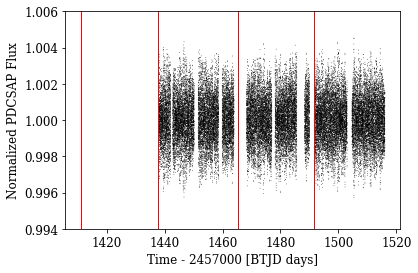

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(t[time_mask], f[time_mask], s=0.5, c='k', edgecolor = '')

#ax.set_xlim(1430, 1440)
ax.set_ylim(0.994, 1.006)

ax.set_xlabel('Time - 2457000 [BTJD days]')
ax.set_ylabel('Normalized PDCSAP Flux')

[ax.axvline(_x, linewidth=1, color='red', linestyle='-', alpha=1) for _x in sectors]



plt.show()

#fig.savefig('betaPic_lc_all.pdf', bbox_inches='tight')

Export the lightcurve as instrumental magnitudes

In [34]:
datapairs=np.stack((t[time_mask], -2.5*np.log10(f[time_mask])), axis=-1)
np.savetxt('betaPic_mag_analysis.txt',datapairs)

# Plot of the Pipeline Apertures on the TPFs and some brighter stars.

In [55]:
tpf4_path = datadir + datafile4_tp
tpf5_path = datadir + datafile5_tp
tpf6_path = datadir + datafile6_tp
tpf7_path = datadir + datafile7_tp

In [56]:
tpf4 = lk.targetpixelfile.TessTargetPixelFile(tpf4_path)
tpf5 = lk.targetpixelfile.TessTargetPixelFile(tpf5_path)
tpf6 = lk.targetpixelfile.TessTargetPixelFile(tpf6_path)
tpf7 = lk.targetpixelfile.TessTargetPixelFile(tpf7_path)

In [57]:
tpfs = [tpf4, tpf5, tpf6, tpf7]

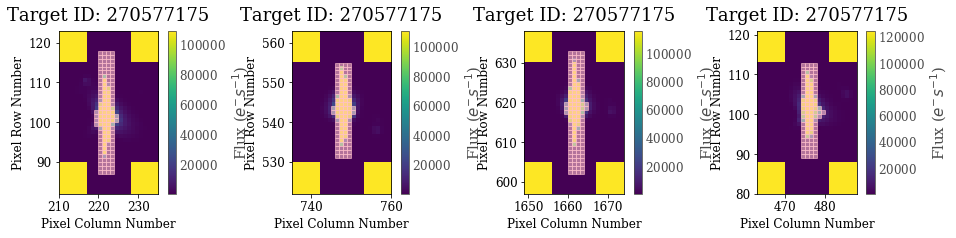

In [58]:
fig, axs = plt.subplots(1, 4, figsize=(16, 3))
for idx, tpf in enumerate(tpfs):
    aper = tpf.pipeline_mask
    tpf.plot(aperture_mask=aper, ax=axs[idx])

In [60]:
#tpf5.interact_sky()

In [61]:
idx = tpf5.pipeline_mask

#a list of tuples with the coordinates where bottom left is [0,0]
column = []
for i in range(0,41):
    row = []
    for j in range(0,25):
        row.append([j,i])
    column.append(row)
    
column = np.array(column)

#gives back coords. of pxls that were used
mask_coords = np.array([val[idx[i]].tolist() for i, val in enumerate(column) if len(val[idx[i]].tolist()) > 0])

mask_coords[::-1]

array([list([[11, 32], [12, 32], [13, 32], [14, 32]]),
       list([[11, 31], [12, 31], [13, 31], [14, 31]]),
       list([[11, 30], [12, 30], [13, 30], [14, 30]]),
       list([[11, 29], [12, 29], [13, 29], [14, 29]]),
       list([[11, 28], [12, 28], [13, 28], [14, 28]]),
       list([[11, 27], [12, 27], [13, 27], [14, 27]]),
       list([[11, 26], [12, 26], [13, 26], [14, 26]]),
       list([[11, 25], [12, 25], [13, 25], [14, 25]]),
       list([[11, 24], [12, 24], [13, 24], [14, 24]]),
       list([[11, 23], [12, 23], [13, 23], [14, 23]]),
       list([[11, 22], [12, 22], [13, 22], [14, 22]]),
       list([[10, 21], [11, 21], [12, 21], [13, 21], [14, 21], [15, 21]]),
       list([[10, 20], [11, 20], [12, 20], [13, 20], [14, 20], [15, 20]]),
       list([[11, 19], [12, 19], [13, 19], [14, 19]]),
       list([[11, 18], [12, 18], [13, 18], [14, 18]]),
       list([[11, 17], [12, 17], [13, 17], [14, 17]]),
       list([[11, 16], [12, 16], [13, 16], [14, 16]]),
       list([[11, 15], [1

In [62]:
mask_coords_borders00 = [[10, 20], [11, 20], [11, 9]]
mask_coords_borders10 = [[14, 9], [14, 20], [15, 20]]
mask_coords_borders11 = [[15, 21], [14, 21], [14, 32]]
mask_coords_borders01 = [[11, 32], [11, 21],[10, 21]]

mask_coords_borders01 = [[i[0],i[1]+1] for i in mask_coords_borders01]
mask_coords_borders11 = [[i[0]+1,i[1]+1] for i in mask_coords_borders11]
mask_coords_borders10 = [[i[0]+1,i[1]] for i in mask_coords_borders10]

mask_coords_borders = mask_coords_borders00+mask_coords_borders10+mask_coords_borders11+mask_coords_borders01+[mask_coords_borders00[0]]

a5,b5=np.array(mask_coords_borders).T

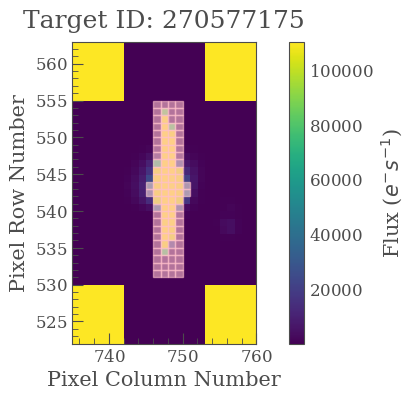

In [65]:
tpf5.plot(aperture_mask=tpf5.pipeline_mask);

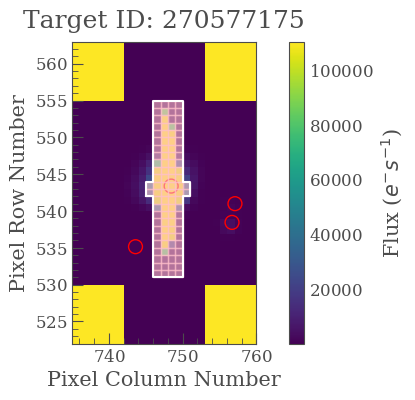

In [66]:
tpf5.plot(aperture_mask=tpf5.pipeline_mask);
plt.plot(a5+tpf5.column,b5+tpf5.row, c='w')
plt.scatter(748.445, 543.384, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(756.710, 538.453, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(757.107, 540.995, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(743.603, 535.154, marker='o', s=100, facecolor='', edgecolor='r')

In [67]:
idx = tpf6.pipeline_mask

#a list of tuples with the coordinates where bottom left is [0,0]
column = []
for i in range(0,41):
    row = []
    for j in range(0,25):
        row.append([j,i])
    column.append(row)
    
column = np.array(column)

#gives back coords. of pxls that were used
mask_coords = np.array([val[idx[i]].tolist() for i, val in enumerate(column) if len(val[idx[i]].tolist()) > 0])

mask_coords[::-1]

array([list([[11, 35], [12, 35], [13, 35], [14, 35]]),
       list([[11, 34], [12, 34], [13, 34], [14, 34]]),
       list([[11, 33], [12, 33], [13, 33], [14, 33]]),
       list([[11, 32], [12, 32], [13, 32], [14, 32]]),
       list([[11, 31], [12, 31], [13, 31], [14, 31]]),
       list([[11, 30], [12, 30], [13, 30], [14, 30]]),
       list([[11, 29], [12, 29], [13, 29], [14, 29]]),
       list([[11, 28], [12, 28], [13, 28], [14, 28]]),
       list([[11, 27], [12, 27], [13, 27], [14, 27]]),
       list([[11, 26], [12, 26], [13, 26], [14, 26]]),
       list([[11, 25], [12, 25], [13, 25], [14, 25]]),
       list([[11, 24], [12, 24], [13, 24], [14, 24]]),
       list([[11, 23], [12, 23], [13, 23], [14, 23]]),
       list([[10, 22], [11, 22], [12, 22], [13, 22], [14, 22], [15, 22]]),
       list([[10, 21], [11, 21], [12, 21], [13, 21], [14, 21], [15, 21]]),
       list([[10, 20], [11, 20], [12, 20], [13, 20], [14, 20]]),
       list([[11, 19], [12, 19], [13, 19], [14, 19]]),
       list([[1

In [68]:
mask_coords_borders00 = [[10, 20], [11, 20], [11, 5]]
mask_coords_borders10 = [[14, 5], [14, 21], [15, 21]]
mask_coords_borders11 = [[15, 22], [14, 22], [14, 35]]
mask_coords_borders01 = [[11, 35], [11, 22],[10, 22]]

mask_coords_borders01 = [[i[0],i[1]+1] for i in mask_coords_borders01]
mask_coords_borders11 = [[i[0]+1,i[1]+1] for i in mask_coords_borders11]
mask_coords_borders10 = [[i[0]+1,i[1]] for i in mask_coords_borders10]

mask_coords_borders = mask_coords_borders00+mask_coords_borders10+mask_coords_borders11+mask_coords_borders01+[mask_coords_borders00[0]]

a6,b6=np.array(mask_coords_borders).T

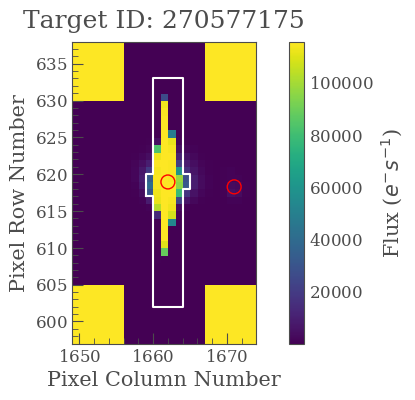

In [69]:
tpf6.plot();#aperture_mask=tpf6.pipeline_mask
plt.plot(a6+tpf6.column,b6+tpf6.row, c='w')
plt.scatter(1662, 618.942, marker='o', s=100, facecolor='', edgecolor='r')
plt.scatter(1671, 618.276, marker='o', s=100, facecolor='', edgecolor='r')

In [71]:
#tpf6.interact_sky()

<Figure size 432x288 with 0 Axes>

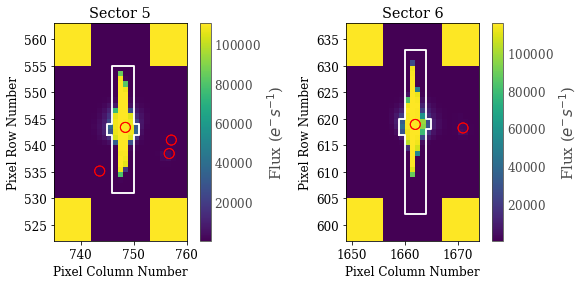

In [72]:
plt.rc('font', family='serif')
plt.tight_layout()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for idx, tpf in enumerate([tpf5,tpf6]):
    aper = tpf.pipeline_mask
    tpf.plot(ax=axs[idx])
    
    axs[0].set_title('Sector 5')
    axs[1].set_title('Sector 6')
    
    axs[0].plot(a5+tpf5.column,b5+tpf5.row, c='w')
    axs[0].scatter(748.445, 543.384, marker='o', s=100, facecolor='', edgecolor='r')
    axs[0].scatter(756.710, 538.453, marker='o', s=100, facecolor='', edgecolor='r')
    axs[0].scatter(757.107, 540.995, marker='o', s=100, facecolor='', edgecolor='r')
    axs[0].scatter(743.603, 535.154, marker='o', s=100, facecolor='', edgecolor='r')
    
    axs[1].plot(a6+tpf6.column,b6+tpf6.row, c='w')
    axs[1].scatter(1662, 618.942, marker='o', s=100, facecolor='', edgecolor='r')
    axs[1].scatter(1671, 618.276, marker='o', s=100, facecolor='', edgecolor='r')
    
plt.subplots_adjust(wspace=0.1)
    
#fig.savefig('betaPic_otherstars.pdf', bbox_inches='tight')

In [73]:
tpf4 = fits.getdata(datadir + datafile4_tp)
tpf5 = fits.getdata(datadir + datafile5_tp)
tpf6 = fits.getdata(datadir + datafile6_tp)
tpf7 = fits.getdata(datadir + datafile7_tp)

In [74]:
hdul = fits.open(datadir + datafile4_tp)

In [75]:
hdul[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                20528 / length of first array dimension                
NAXIS2  =                18684 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   11 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

# Let's have a look at the closest stars to beta Pic with SC data. 

In [78]:
ffi = lk.search_tesscut('beta Pictoris', sector=6).download(cutout_size=(150, 150))

In [79]:
search_results = lk.search_targetpixelfile('beta Pictoris', radius = 1500, sector = 6)
print(search_results)

SearchResult containing 10 data products.

target_name                     productFilename                        description          distance     
----------- ------------------------------------------------------- ------------------ ------------------
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_tp.fits Target pixel files                0.0
  270574544 tess2018349182459-s0006-0000000270574544-0126-s_tp.fits Target pixel files   810.286374455406
  270626557 tess2018349182459-s0006-0000000270626557-0126-s_tp.fits Target pixel files   999.919442532116
  231824115 tess2018349182459-s0006-0000000231824115-0126-s_tp.fits Target pixel files  1015.211306965186
  231821282 tess2018349182459-s0006-0000000231821282-0126-s_tp.fits Target pixel files 1058.8241738357744
  270624029 tess2018349182459-s0006-0000000270624029-0126-s_tp.fits Target pixel files   1106.43108759112
  270673397 tess2018349182459-s0006-0000000270673397-0126-s_tp.fits Target pixel files  1295.409149355853
  2

In [80]:
tpfs = search_results.download_all()

In [81]:
#calculates the median position of the star on the ccd
def cen(tpf_number):
    tmp = tpfs[tpf_number]
    c,r = tmp.estimate_centroids()
    return [np.median(c), np.median(r)]

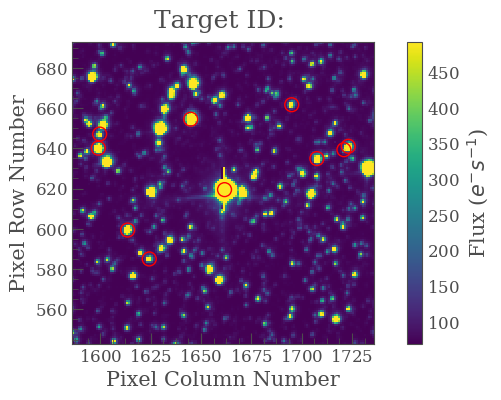

In [82]:
ffi.plot();
for i in range(0, len(tpfs)):
    plt.scatter(cen(i)[0], cen(i)[1], marker='o', s=100, facecolor='', edgecolor='r');

This is a cutout from a FFI of Sector 6. It is 150 by 150 pixels or about 3000 by 3000 arcseconds big (1 pixel is about 21 arcseconds big). The bright star in the very center is beta Pic. The stars marked with red circles have SC data. The two closest stars were checked for a dips like beta Pic.

The closest star has strong pulsations, the second closest not. A dip - similar the one in beta Pic - cannot be seen.

In [85]:
search_results = lk.search_targetpixelfile('beta Pictoris', sector = 6).download()

In [84]:
search_results.interact(notebook_url='localhost:8888') #our localhost can be seen in the url.. change it if necessary

# Let's quickly look at the two closest stars with SC data.

In [86]:
name = 'beta Pic'

In [88]:
#radius is in arcseconds 
search_results = lk.search_lightcurvefile(name, radius = 1000)
search_results

SearchResult containing 11 data products.

target_name                     productFilename                     description      distance    
----------- ------------------------------------------------------- ------------ ----------------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_lc.fits Light curves              0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_lc.fits Light curves              0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_lc.fits Light curves              0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_lc.fits Light curves              0.0
  270574544 tess2018292075959-s0004-0000000270574544-0124-s_lc.fits Light curves 810.286374455406
  270574544 tess2018319095959-s0005-0000000270574544-0125-s_lc.fits Light curves 810.286374455406
  270574544 tess2018349182459-s0006-0000000270574544-0126-s_lc.fits Light curves 810.286374455406
  270574544 tess2019006130736-s0007-0000000270574544-0131-s_lc.fits Light c

In [92]:
name_1 = 'TIC 270574544' #the closest star w/ SC data
name_2 = 'TIC 270626557' #the second closest star w/ SC data

In [93]:
lcs_1 = lk.search_lightcurvefile(name_1).download_all()
lcs_2 = lk.search_lightcurvefile(name_2).download_all()

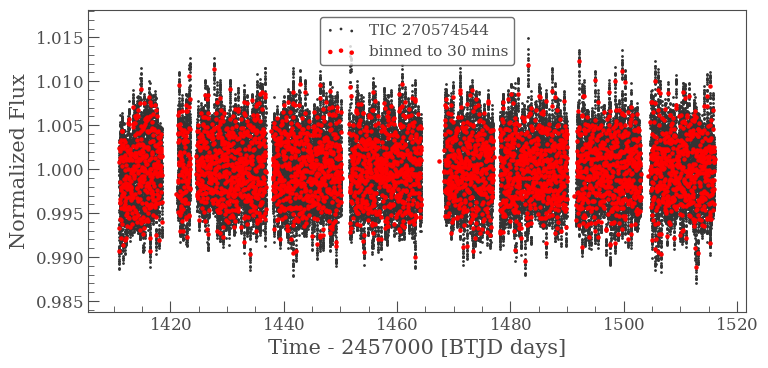

In [94]:
lc_1 = lcs_1[0].PDCSAP_FLUX.normalize()
for i in range(1,4):
    lc_1 = lc_1.append(lcs_1[i].PDCSAP_FLUX.normalize())
ax = lc_1.scatter();  
lc_1.bin(15).scatter(ax=ax, c='r',s=5, label= 'binned to 30 mins');
#plt.xlim(1440,1443)

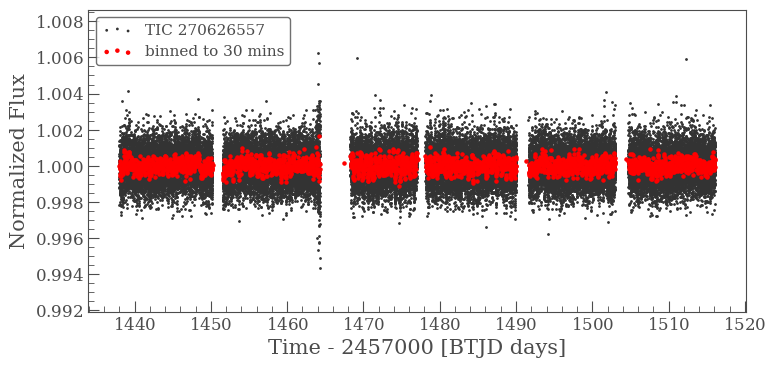

In [95]:
lc_2 = lcs_2[0].PDCSAP_FLUX.normalize()
for i in range(1,3):
    lc_2 = lc_2.append(lcs_2[i].PDCSAP_FLUX.normalize())
ax = lc_2.scatter();  
lc_2.bin(15).scatter(ax=ax, c='r',s=5, label= 'binned to 30 mins');
#plt.xlim(1440,1443)

In neither of those two lcs a decrease in luminosity can be observed at BTJD 1486 (where the big dip happend for beta Pic).

# Plot of the 3 events 

In [98]:
datadir = os.getcwd()
datafile = '/betaPic_mag_res.dat'

t, f = np.loadtxt(datadir + datafile, usecols=(0,1)).T

In [99]:
def bins(time, flux, binsize):
    n_bins = len(time) // binsize
    indexes = np.array_split(np.arange(len(time)), n_bins)
    print((indexes[0]).size)
    binned_time = np.array([np.mean(time[a]) for a in indexes])
    binned_flux = np.array([np.mean(flux[a]) for a in indexes])
    binned_flux_err = np.array([np.std(flux[a])/np.sqrt(a.size) for a in indexes])

    return (binned_time, binned_flux,binned_flux_err)

16
16
16
16
16
16


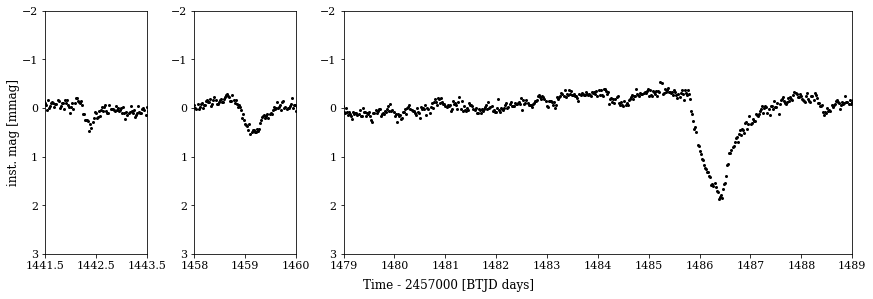

In [101]:
fig5 , ax = plt.subplots(constrained_layout=True, figsize=(12, 4))

plt.rc('font', family='serif', size=11)
plt.tight_layout()

#xlim range: xmin to xmax
xmin = [1441.5, 1458, 1485-6]
xmax = [1443.5, 1460, 1489]

#the sizes of the subplots
widths = [2, 2, 10]
heights = [1,1,1]


ax.set_xlabel('Time - 2457000 [BTJD days]', labelpad=25, fontsize=12)
ax.set_ylabel('inst. mag [mmag]', labelpad=25, fontsize=12)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

#ax.axis('off')

spec5 = fig5.add_gridspec(ncols=3, nrows=1, width_ratios=widths)
for row in range(1):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        ax.scatter(bins(t, f, 15)[0],1000*bins(t, f, 15)[1], c='k', s=4)
        ax.set_xlim(xmin[col], xmax[col])
        ax.invert_yaxis()
        ax.set_ylim(3,-2)
        ax.set_xticks(np.linspace(xmin[col], xmax[col], widths[col]+1))
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        #ax.set_xlabel('Time - 2457000 [BTJD days]')
        #ax.set_ylabel('inst. mag [mmag]', labelpad=-5)


    
plt.subplots_adjust(wspace=0.2)

#fig5.savefig('betaPic_3zoom3.pdf', bbox_inches='tight')